In [1]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
df = pd.read_csv('heart.csv')
print(df)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  heartdisease  
0         2   2     3             0  

C:\Users\Aditya\anaconda3\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


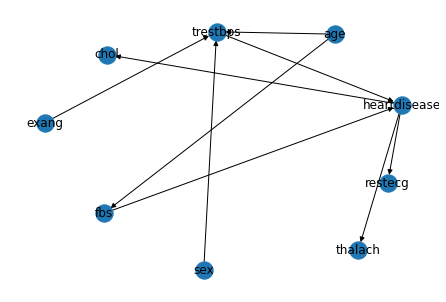

In [2]:
network = [('age','trestbps'),('age','fbs'), ('sex','trestbps'),('exang','trestbps'),('trestbps','heartdisease'),('fbs','heartdisease'),('heartdisease','restecg'), ('heartdisease','thalach'),('heartdisease','chol')]
model=BayesianModel(network)
model.fit(df,estimator=MaximumLikelihoodEstimator)
infer = VariableElimination(model)
import networkx as nx
nx.draw(model,with_labels=True)

In [4]:
print('Probability of HeartDisease given Age=28') 
q= infer.query(variables=['heartdisease'],evidence ={'age':28})
print(q)
print('Probability of HeartDisease given cholesterol=100') 
q= infer.query(variables=['heartdisease'],evidence ={'chol':100})
print(q)

Probability of HeartDisease given Age=28


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.4344 |
+-----------------+---------------------+
| heartdisease(1) |              0.5656 |
+-----------------+---------------------+
Probability of HeartDisease given cholesterol=100


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.0000 |
+-----------------+---------------------+
| heartdisease(1) |              1.0000 |
+-----------------+---------------------+
